In [9]:
import sys
sys.path.append("..")
from functions.functions import * 

# Preprocessing

In [10]:
X_train, X_test, X_val, y_train, y_test, y_val = preprocess(file_paths)

# Feature Selection

In [13]:
# Selected features
selected_features = ['minimum_nights', 
                     'number_of_reviews', 
                     'reviews_per_month', 
                     'calculated_host_listings_count', 
                     'availability_365',
                     'Host Response Rate', 
                     'Accommodates', 
                     'Bathrooms', 
                     'Bedrooms', 
                     'Beds', 
                     'Square Feet',
                     'recency_last_review' ,
                     'last_review_day', 
                     'last_review_month', 
                     'last_review_year', 
                     'room_type_Entire home/apt', 
                     'room_type_Private room', 
                     'room_type_Shared room',
                     'mean_target_neighbourhood',
                     'mean_target_neighbourhood_group',
                     'neighbourhood_group_Bronx', 
                     'neighbourhood_group_Brooklyn',
                     'neighbourhood_group_Manhattan',
                     'neighbourhood_group_Queens',
                     'neighbourhood_group_Staten Island',
                     'x', 
                     'y', 
                     'z',
                     'text_encoding_tsne_1',
                     'text_encoding_tsne_2']


# Prepare feature matrices
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
X_val_selected = X_val[selected_features]

X_train_np = X_train_selected.to_numpy()
X_test_np = X_test_selected.to_numpy()
X_val_np = X_val_selected.to_numpy()

scaler = MinMaxScaler()
X_train_np = scaler.fit_transform(X_train_np)
X_test_np = scaler.transform(X_test_np)
X_val_np = scaler.transform(X_val_np)

y_train_np = y_train.to_numpy().flatten()
y_test_np = y_test.to_numpy().flatten()
y_val_np = y_val.to_numpy().flatten()

X_test_selected.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Host Response Rate,Accommodates,Bathrooms,Bedrooms,Beds,...,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,x,y,z,text_encoding_tsne_1,text_encoding_tsne_2
27357,3,4,2.45,1,23,-2.0,-2.0,-2.0,-2.0,-2.0,...,0,0,1,0,0,0.208824,-0.728089,0.652900,-7.517027,-0.076676
17998,1,35,2.75,10,156,-2.0,-2.0,-2.0,-2.0,-2.0,...,0,0,1,0,0,0.208893,-0.728482,0.652440,-7.517027,-0.076676
11703,3,16,0.62,4,37,-2.0,-2.0,-2.0,-2.0,-2.0,...,0,1,0,0,0,0.209660,-0.728891,0.651737,-7.517027,-0.076676
25026,1,0,0.00,10,284,-2.0,-2.0,-2.0,-2.0,-2.0,...,0,0,1,0,0,0.208956,-0.727793,0.653188,-7.517027,-0.076676
31283,1,0,0.00,1,43,-2.0,-2.0,-2.0,-2.0,-2.0,...,0,1,0,0,0,0.209579,-0.728689,0.651989,-7.517027,-0.076676


# Extremely Randomized Forest

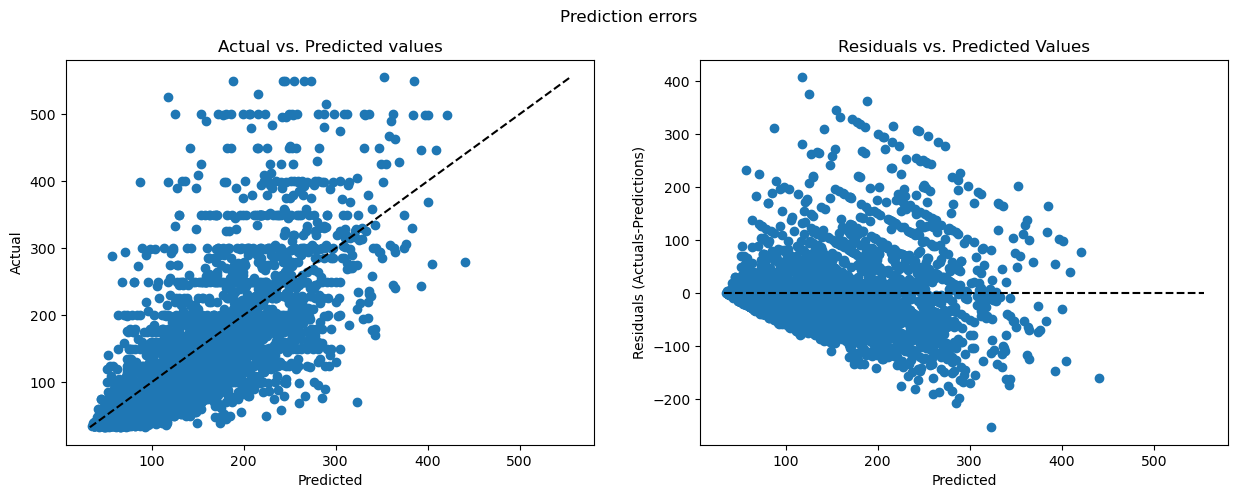

R²: 0.5489989982215241
MAE: 41.43614534401769
MSE: 4034.7732745786125
RMSE: 63.51986519647702
MAPE: 0.3295213833628694
error_ratio_rmse: 0.45925894759290997
error_ratio_mae: 0.2995900643702227


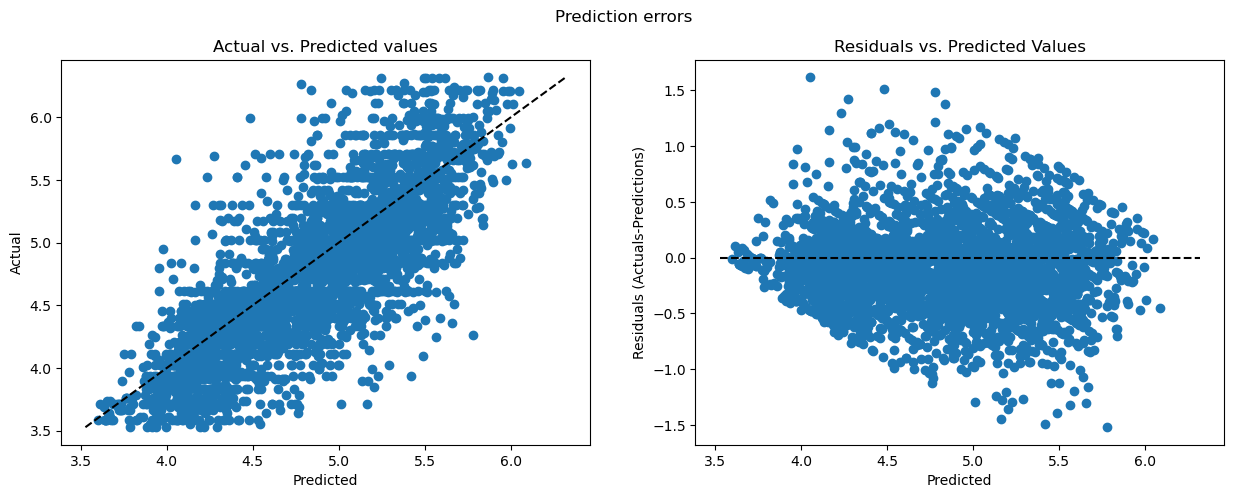

R²: 0.6329702840193824
MAE: 0.2871877736238484
MSE: 0.14263889710096836
RMSE: 0.3776756506593566
MAPE: 0.06190430741505471
error_ratio_rmse: 0.0797099019223189
error_ratio_mae: 0.06061208666452576


In [15]:
model_init = ExtraTreesRegressor(criterion = "squared_error").fit(X_train_np, y_train_np)
y_pred = np.maximum(0,model_init.predict(X_test_np))

# score for price
model_init_score=scores(y_test_np,y_pred,plot= True)

# score for log_price
model_init_logscore=scores(np.log(y_test_np+1),np.log(y_pred+1),plot= True)

#### Model Tuning

In [8]:
space={       
        'n_estimators':hp.quniform('n_estimators',10,500,1),
        'max_depth':hp.quniform('max_depth',5,20,1),
        'min_samples_leaf':hp.quniform('min_samples_leaf',1,5,1),
        'min_samples_split':hp.quniform('min_samples_split',2,6,1),
        'max_features':hp.uniform('max_features',0.0,1.0),
        'min_impurity_decrease':hp.uniform('min_impurity_decrease',0.0001,0.2), 
        'random_state': hp.quniform('random_state',0,400,1)
    }

def objective(space):
    mod=ExtraTreesRegressor(
                          n_estimators =int(space['n_estimators']), 
                          max_depth = int(space['max_depth']), 
                          min_samples_leaf = int(space['min_samples_leaf']),
                          min_samples_split = int(space['min_samples_split']),
                          max_features=space['max_features'],
                          min_impurity_decrease=space['min_impurity_decrease'],
                          random_state = int(space['random_state']),
                          criterion = 'squared_error',
                          oob_score = True,
                          bootstrap = True
                       )
    
    mod.fit(X_train_np, y_train_np)

    y_pred = mod.predict(X_test_np)
    score = scores(y_test_np, y_pred)['RMSE']
    print ("SCORE:", score)

    return {'loss': score, 'status': STATUS_OK }

trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

R²: 0.4705573405269552                                                                                                 
MAE: 46.07661765854346                                                                                                 
MSE: 4736.532922188325                                                                                                 
RMSE: 68.8224739615507                                                                                                 
MAPE: 0.3783101463108097                                                                                               
error_ratio_rmse: 0.4975976706587099                                                                                   
error_ratio_mae: 0.3331414332988416                                                                                    
SCORE:                                                                                                                 
68.8224739615507                        

MAE: 41.903598016711214                                                                                                
MSE: 4067.388485674296                                                                                                 
RMSE: 63.77608082717451                                                                                                
MAPE: 0.33171283529930107                                                                                              
error_ratio_rmse: 0.46111142823887813                                                                                  
error_ratio_mae: 0.30296982315665394                                                                                   
SCORE:                                                                                                                 
63.77608082717451                                                                                                      
R²: 0.47208273066534867                 

C:\Users\adelr\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



R²: 0.5595226378625235                                                                                                 
MAE: 41.36214034293876                                                                                                 
MSE: 3940.6260336470796                                                                                                
RMSE: 62.7744058804787                                                                                                 
MAPE: 0.33063699442858313                                                                                              
error_ratio_rmse: 0.4538691555982364                                                                                   
error_ratio_mae: 0.29905499618632475                                                                                   
SCORE:                                                                                                                 
62.7744058804787                        

MAE: 44.54338158974559                                                                                                 
MSE: 4518.139178327725                                                                                                 
RMSE: 67.21710480471265                                                                                                
MAPE: 0.35580219032559424                                                                                              
error_ratio_rmse: 0.48599059077610884                                                                                  
error_ratio_mae: 0.3220558873646753                                                                                    
SCORE:                                                                                                                 
67.21710480471265                                                                                                      
R²: 0.5161142872092888                  

MSE: 4087.054530517937                                                                                                 
RMSE: 63.930075320759144                                                                                               
MAPE: 0.3324314409718936                                                                                               
error_ratio_rmse: 0.4622248334521925                                                                                   
error_ratio_mae: 0.30395990648266563                                                                                   
SCORE:                                                                                                                 
63.930075320759144                                                                                                     
R²: 0.37702613503179117                                                                                                
MAE: 52.492562155507244                 

RMSE: 62.81436284809642                                                                                                
MAPE: 0.32978592398960144                                                                                              
error_ratio_rmse: 0.45415805096727335                                                                                  
error_ratio_mae: 0.2987662901171187                                                                                    
SCORE:                                                                                                                 
62.81436284809642                                                                                                      
R²: 0.5602251705954961                                                                                                 
MAE: 41.258524427404566                                                                                                
MSE: 3934.3409915200405                 

MAPE: 0.34498772374712067                                                                                              
error_ratio_rmse: 0.4757723604459916                                                                                   
error_ratio_mae: 0.31401715370560174                                                                                   
SCORE:                                                                                                                 
65.80382670416068                                                                                                      
R²: 0.5566572129692438                                                                                                 
MAE: 41.4689377790051                                                                                                  
MSE: 3966.2608764392844                                                                                                
RMSE: 62.97825717213271                 

error_ratio_rmse: 0.45555087770097624                                                                                  
error_ratio_mae: 0.29940533349377707                                                                                   
SCORE:                                                                                                                 
63.00700398623986                                                                                                      
R²: 0.5612077733056773                                                                                                 
MAE: 41.112426704627254                                                                                                
MSE: 3925.550369905159                                                                                                 
RMSE: 62.65421270676984                                                                                                
MAPE: 0.32563480172980935               

In [18]:
best_hyperparams = {'max_depth': 19.0,
                     'max_features': 0.9200381688508471,
                     'min_impurity_decrease': 0.06643503644010626,
                     'min_samples_leaf': 2.0,
                     'min_samples_split': 4.0,
                     'n_estimators': 349.0,
                     'random_state': 191.0}

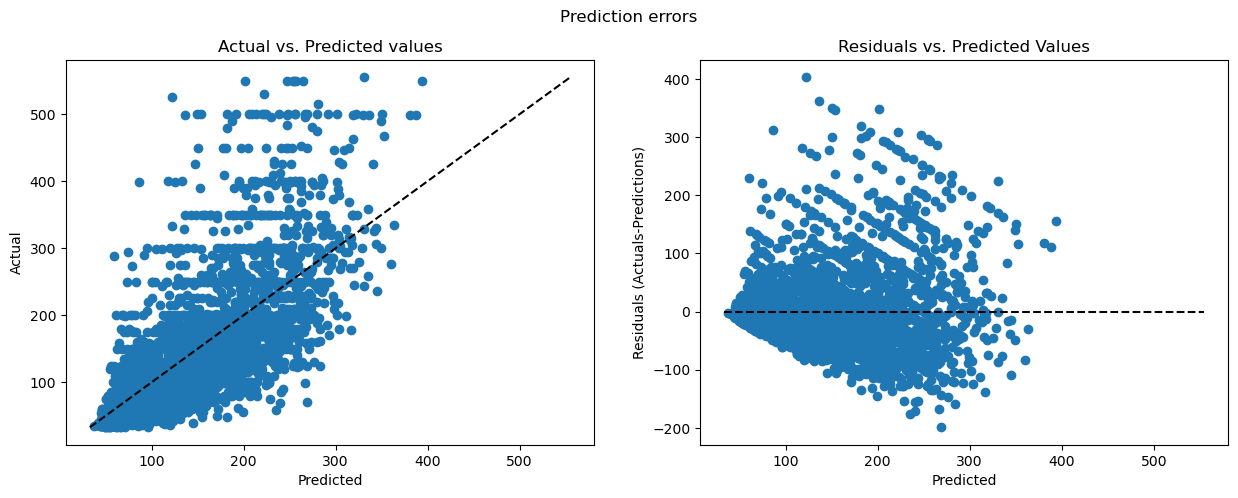

R²: 0.5617499201528038
MAE: 41.06960290091395
MSE: 3920.700181987488
RMSE: 62.61549474361349
MAPE: 0.325223859631188
error_ratio_rmse: 0.45272020225502996
error_ratio_mae: 0.296939902942026


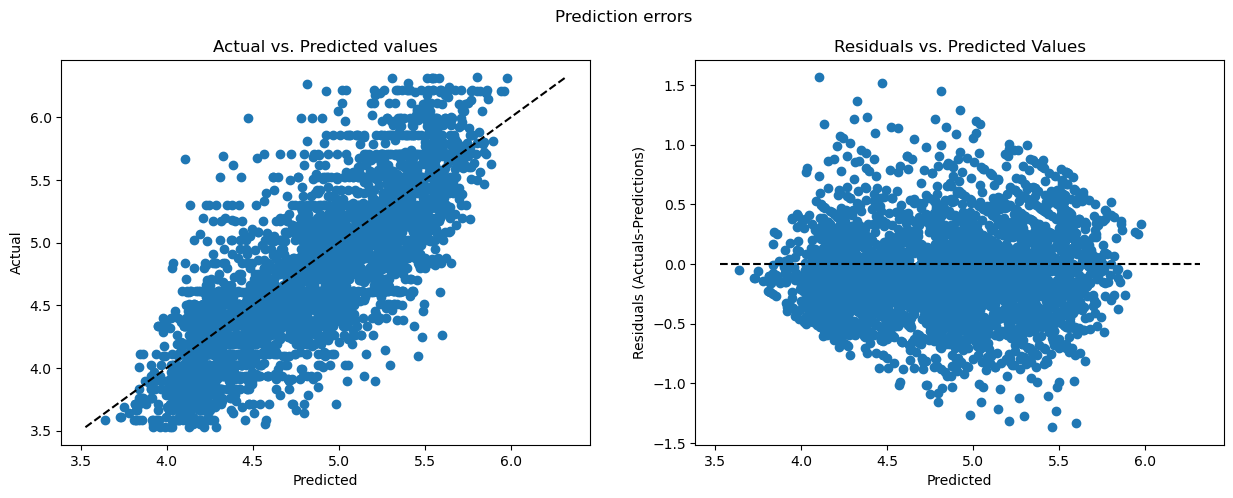

R²: 0.6449682571140172
MAE: 0.2883980399171886
MSE: 0.13797612028712541
RMSE: 0.37145137001648737
MAPE: 0.06226774152063141
error_ratio_rmse: 0.07839624349950576
error_ratio_mae: 0.06086751803102666


In [19]:
model_tuned = ExtraTreesRegressor(
                          n_estimators =int(best_hyperparams['n_estimators']), 
                          max_depth = int(best_hyperparams['max_depth']), 
                          min_samples_leaf = int(best_hyperparams['min_samples_leaf']),
                          min_samples_split = int(best_hyperparams['min_samples_split']),
                          max_features=best_hyperparams['max_features'],
                          min_impurity_decrease=best_hyperparams['min_impurity_decrease'],
                          random_state = int(best_hyperparams['random_state']),
                          criterion = 'squared_error',
                          oob_score = True,
                          bootstrap = True
                       )

model_tuned.fit(X_train_np, y_train_np)

y_pred = np.maximum(0,model_tuned.predict(X_test_np))
model_tuned_score = scores(y_test_np,y_pred,plot=True)
model_tuned_logscore= scores(np.log(y_test_np+1),np.log(y_pred+1),plot= True)

# Save Model

In [20]:
ext_rf_params = model_tuned.get_params()

# Save the parameters as a JSON file
with open('saved_models/extremely_randomized_forest_params.json', 'w') as f:
    json.dump(ext_rf_params, f)